# Python vs. NumPy - RGB noise generator

I needed a random RGB noise image generated for further image processing purposes, so I wrote a function that creates a three dimensional array, filled with values between 0 and 255. These correspond to points of three color channels: red, green, and blue. 

My original function was a combination of Python (separate channels generated with list comprehensions) and NumPy (random integers generation and array stacking). A pure Python would be something like this:


In [1]:
from random import randint

In [14]:
def py_noiser(hres, vres):
    return [[[randint(0,255) for i in range(3)] for i in range (hres)] for i in range(vres)] #must be 0-255

In [16]:
%timeit py_noiser(1920,1080)

18.9 s ± 5.65 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



It takes a while to generate an image in Full HD resolution!



After some research on NumPy functions I finally got to what I believe is the fastest way to do it:


In [17]:
import numpy as np

In [27]:
def numpy_noiser(hres, vres):
    return np.random.randint(0,256, size = (vres, hres, 3), dtype = ('uint8')) 

# please note that in this case it's 0 and 256, as required by the Numpy randint function

In [28]:
%timeit numpy_noiser(1920, 1080)

21.7 ms ± 808 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)



Yep, it's almost a 1000 times faster! The final touch was setting the dtype to unsigned 8-bit integers, which is enough for the 0-255 values, and slashes 30 ms of the execution time! 



And this is what the images look like:


In [23]:
import matplotlib.pyplot as plt

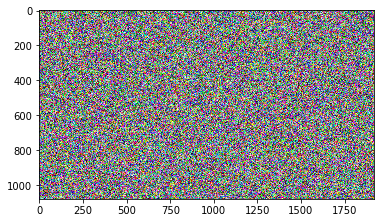

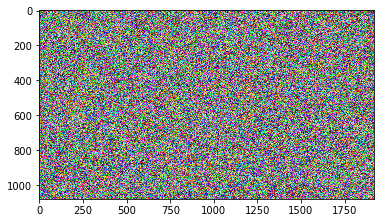

In [26]:
fig, ax = plt.subplots()
plt.imshow(py_noiser(1920,1080))
plt.show()
plt.imshow(numpy_noiser(1920, 1080))
plt.show()